In [1]:
import os, shutil

PATH = 'data/cars/'

In [2]:
!ls {PATH}

test
train
valid


In [3]:
!ls {PATH}train
#train_dir

benz
bmw


In [4]:
!ls train_dir

ls: cannot access 'train_dir': No such file or directory


## Create model

In [5]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Using TensorFlow backend.


In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

## Configuring the model for traning

In [7]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

## Data preprocessing

In [8]:
train_dir = 'data/cars/train/'  
test_dir = 'data/cars/test/'
validation_dir = 'data/cars/valid/'
#!ls train_dir

In [9]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(
                train_dir,
                target_size=(150, 150),
                batch_size=20,
                class_mode='binary'
                )

Found 202 images belonging to 2 classes.


In [10]:
validation_generator = test_datagen.flow_from_directory(
                        validation_dir,
                        target_size=(150, 150),
                        batch_size=20,
                        class_mode='binary'
)

Found 60 images belonging to 2 classes.


In [11]:
train_generator

### check shapes

In [12]:
for data_batch, labels_batch in train_generator:
    print('data batch shape ', data_batch.shape)
    print('labels batch shape', labels_batch.shape)
    break

data batch shape  (20, 150, 150, 3)
labels batch shape (20,)


## Fitting the model using a batch generator

In [13]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=6,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/6
100/100 [==============================] - 94s 944ms/step - loss: 0.6407 - acc: 0.6589 - val_loss: 0.6716 - val_acc: 0.5960

In [14]:
model.save('bmw vs benz.h5')

In [ ]:
## Plotting results

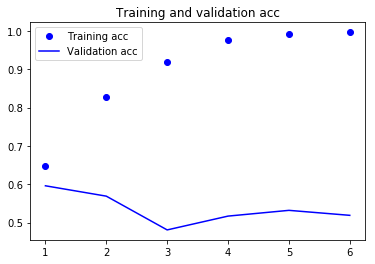

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label="Training acc")
plt.plot(epochs, val_acc, 'b', label="Validation acc")
plt.title("Training and validation acc")
plt.legend()

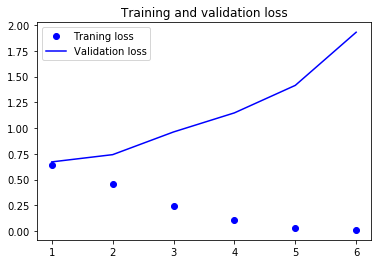

In [16]:
plt.plot(epochs, loss, 'bo', label='Traning loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()